# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | snagov
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | fort st. john
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | middelburg
Processing Record 7 of Set 1 | zaozersk
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | la ronge
Processing Record 15 of Set 1 | hopelchen
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | cestos city
Processing Record 18 of Set 1 | mount pearl
Processing Record 19 of Set 1 | sinop
Processing Record 20 of Set 1 | akrehamn
Processing Record 21 of Set 1 | motueka
Processing Record 22 of Set 1 | waitangi
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,snagov,44.7000,26.1833,265.06,79,0,1.03,RO,1739157919
1,avarua,-21.2078,-159.7750,303.18,74,20,2.06,CK,1739157920
2,fort st. john,56.2499,-120.8529,257.09,66,0,1.54,CA,1739157892
3,puerto ayora,-0.7393,-90.3518,299.01,94,100,1.40,EC,1739157922
4,puerto natales,-51.7236,-72.4875,281.23,90,100,1.62,CL,1739157923


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\Ian O'Connor\Github\python-api-challenge\WeatherPy\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,snagov,44.7000,26.1833,265.06,79,0,1.03,RO,1739157919
1,avarua,-21.2078,-159.7750,303.18,74,20,2.06,CK,1739157920
2,fort st. john,56.2499,-120.8529,257.09,66,0,1.54,CA,1739157892
3,puerto ayora,-0.7393,-90.3518,299.01,94,100,1.40,EC,1739157922
4,puerto natales,-51.7236,-72.4875,281.23,90,100,1.62,CL,1739157923


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

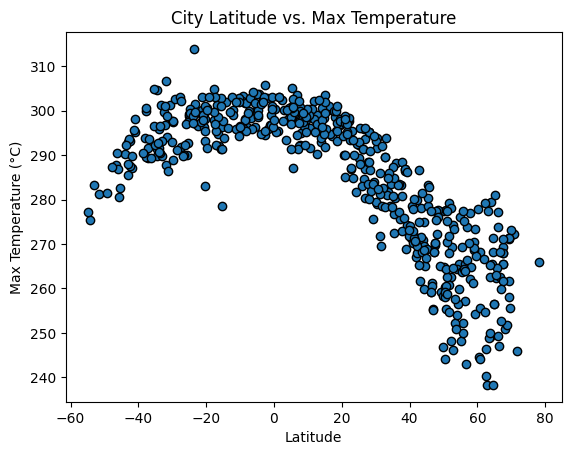

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

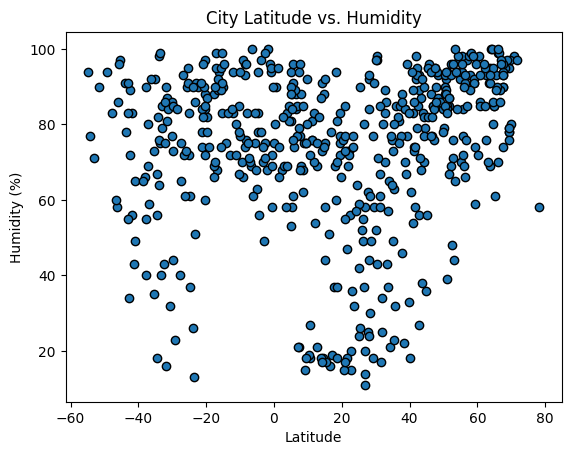

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

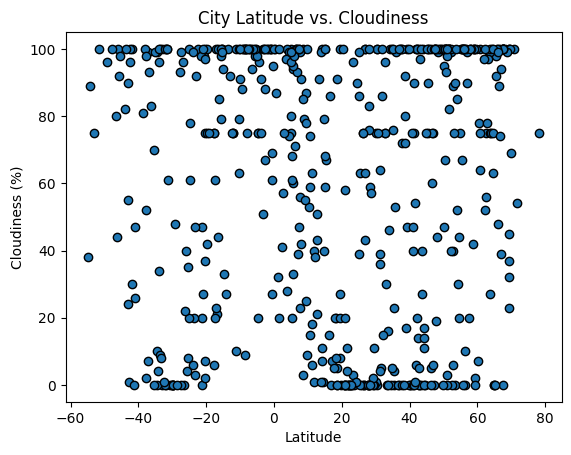

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

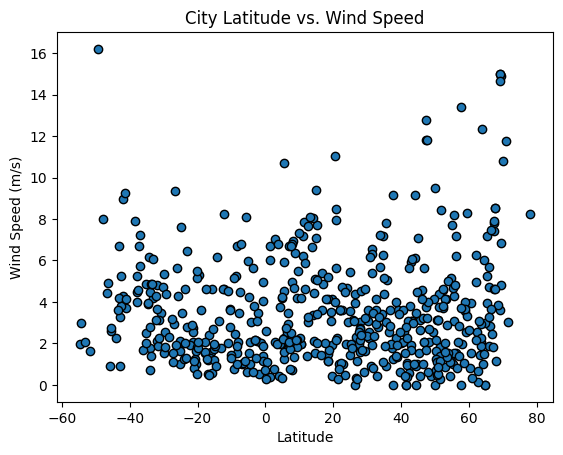

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_values = x * slope + intercept
    plt.scatter(x, y)
    plt.plot(x, regression_values, "r")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"r-squared: {r_value**2}")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,snagov,44.7000,26.1833,265.06,79,0,1.03,RO,1739157919
2,fort st. john,56.2499,-120.8529,257.09,66,0,1.54,CA,1739157892
6,zaozersk,69.4005,32.4476,271.25,79,23,14.88,RU,1739157925
8,isafjordur,66.0755,-23.1240,273.87,99,100,1.89,IS,1739157927
10,college,64.8569,-147.8028,256.52,85,0,0.00,US,1739157929


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,303.18,74,20,2.06,CK,1739157920
3,puerto ayora,-0.7393,-90.3518,299.01,94,100,1.40,EC,1739157922
4,puerto natales,-51.7236,-72.4875,281.23,90,100,1.62,CL,1739157923
5,middelburg,-25.7751,29.4648,290.09,90,4,4.30,ZA,1739157924
7,port-aux-francais,-49.3500,70.2167,281.50,94,96,16.20,TF,1739157926


###  Temperature vs. Latitude Linear Regression Plot

r-squared: 0.7494468602584385


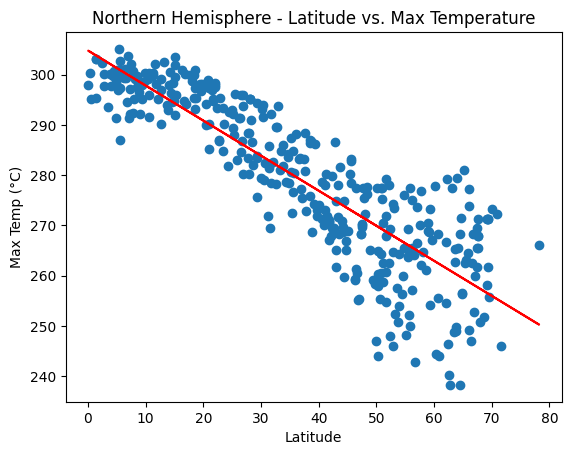

In [ ]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Latitude vs. Max Temp",
                       "Latitude", "Max Temp (°C)")

r-squared: 0.3447490606611574


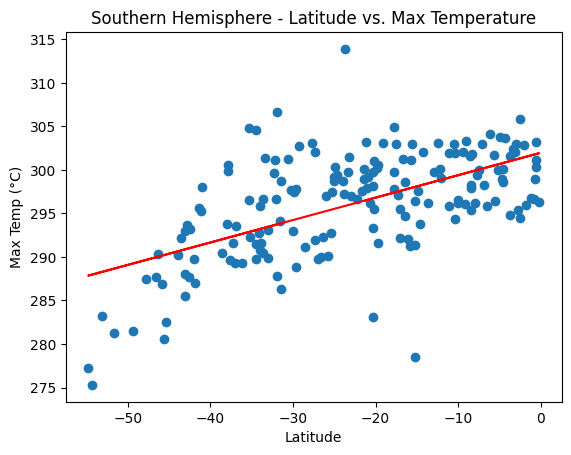

In [ ]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Latitude vs. Max Temp",
                       "Latitude", "Max Temp (°C)")

**Discussion about the linear relationship:** Temperature declines as latitude increases

### Humidity vs. Latitude Linear Regression Plot

r-squared: 0.14619012088586097


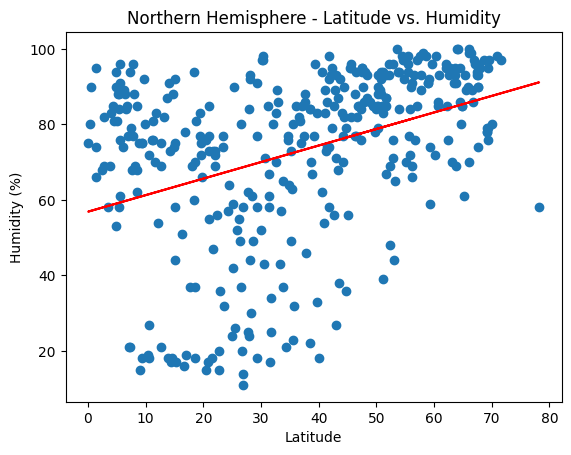

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)")

r-squared: 0.03233338986851056


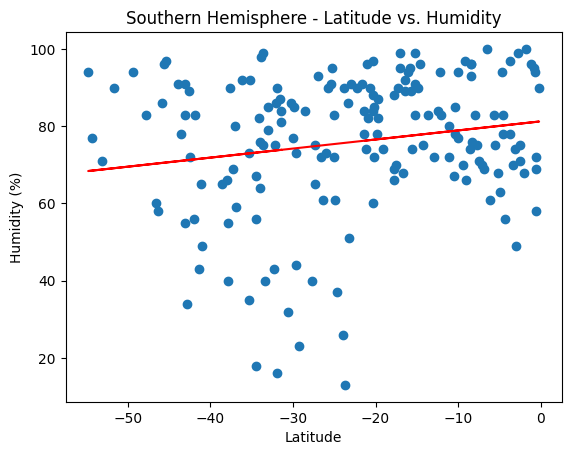

In [35]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** Latitude does not significantly impact humidity

### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.03336915743915316


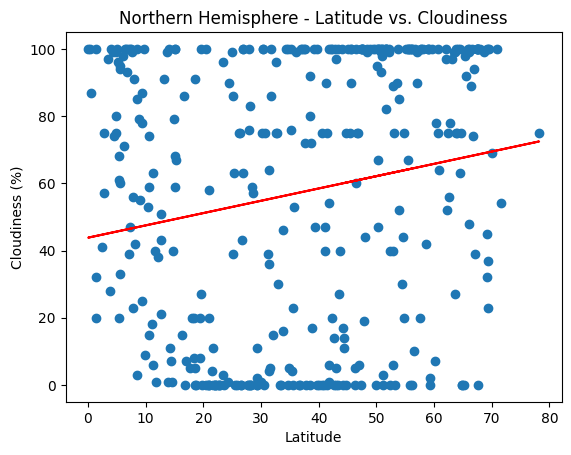

In [36]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)")

r-squared: 0.05188750330838759


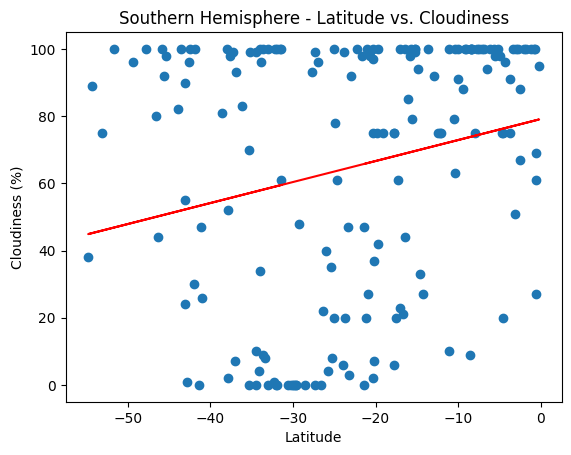

In [37]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** Latitude does not directly influence cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 0.010153330625676141


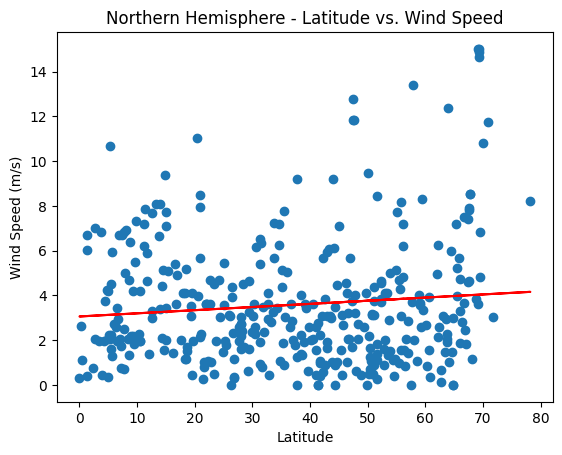

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)")

r-squared: 0.07793990117782702


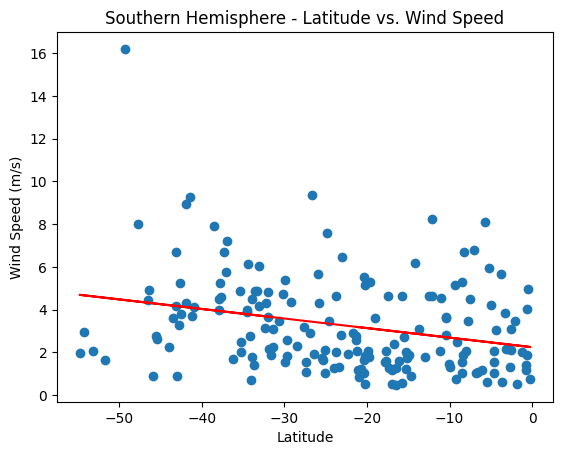

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** Latitude has little to no effect on wind speed